## <h1>**Challenge 1 - Demonstrating Feature Extraction**<h1>

**Applying PCA to Distill Correlated Features into Principal Components Capturing U.S. 10-Year Treasury Market Dynamics**

In [ ]:
#These are the libraries we need to demonstrate feature reduction via PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from sklearn.decomposition import PCA



In [ ]:
start_date = "1990-01-01"
end_date = "2024-01-01"

# DGS10 = 10-year constant maturity yield
dgs10 = pdr.DataReader("DGS10", "fred", start_date, end_date)

In [ ]:
# Pulling pull 2-year and 30-year yields
dgs2 = pdr.DataReader("DGS2", "fred", start_date, end_date)
dgs30 = pdr.DataReader("DGS30", "fred", start_date, end_date)

Through the <b>pandas_datareader </b> library, we were able to fetch the <b>Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity (DGS10)</b> dataset with consistent, well-documented yields without manual downloads. However, the manually downladed dataset has been included as part of the submission


Following the importation/reading of the data, we:

Conducted Series selection: We load 2-year (DGS2), 10-year (DGS10), and 30-year (DGS30) constant maturity yields to capture short-, benchmark-, and long-end behavior of the yield curve.

1. Determined the Time window: Choosing 2010–2025 balances modern policy
regimes (ZLB, QE, QT) and enough variability to produce meaningful components; adjust dates to match your research scope

2. Determined the - Frequency and units: FRED provides daily observations in percent; PCA works on raw levels here because yield curve components are interpreted in level/slope/curvature terms.

In [ ]:
#Structuring the dataset
yields = pd.concat([dgs2, dgs10, dgs30], axis=1)
yields.columns = ["2Y", "10Y", "30Y"]
yields = yields.dropna()


When structuring the dataset, the concat() function is used to align the yield series by date index so that each row represents the same trading day across maturities. The columns are then renamed to 2Y, 10Y, and 30Y for clarity, and the dropna() function is applied to remove days with missing values that could distort PCA results. A quick sanity check with head() function below helps validate the shape and confirm that yields fall within expected ranges of roughly 0–6% over the chosen window

In [ ]:
#Just a glimpse into the top ten observations
print(yields.head(10).to_markdown())

| DATE                |   2Y |   10Y |   30Y |
|:--------------------|-----:|------:|------:|
| 1990-01-02 00:00:00 | 7.87 |  7.94 |  8    |
| 1990-01-03 00:00:00 | 7.94 |  7.99 |  8.04 |
| 1990-01-04 00:00:00 | 7.92 |  7.98 |  8.04 |
| 1990-01-05 00:00:00 | 7.9  |  7.99 |  8.06 |
| 1990-01-08 00:00:00 | 7.9  |  8.02 |  8.09 |
| 1990-01-09 00:00:00 | 7.91 |  8.02 |  8.1  |
| 1990-01-10 00:00:00 | 7.91 |  8.03 |  8.11 |
| 1990-01-11 00:00:00 | 7.91 |  8.04 |  8.11 |
| 1990-01-12 00:00:00 | 7.93 |  8.1  |  8.17 |
| 1990-01-16 00:00:00 | 8.1  |  8.2  |  8.25 |


In [ ]:
#Applying PCA
pca = PCA(n_components=3)
pca.fit(yields)

PCA(n_components=3)

When fitting PCA using pca.fit(yeids), the algorithm analyzes how the different yield maturities vary together and identifies the main directions in which the data spreads. These directions are ranked by how much of the overall variation they capture—this is known as the explained variance. Once these directions are found, the data is transformed by projecting each daily yield observation onto the top few components, which represent the most important patterns in the dataset. This transformation reduces the number of variables while keeping the core structure intact. In the context of yield curve analysis, the first component typically reflects overall shifts in interest rates, called (the level), the second captures differences between short- and long-term rates (the slope), and the third highlights changes that are strongest in the middle maturities (the curvature). Together, these components offer a simplified yet powerful view of how the yield curve evolves over time. curve.

In [ ]:
# Transforming data into principal components
components = pca.transform(yields)

# Analyzing the results
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

Explained variance ratio: [9.43839593e-01 5.54551202e-02 7.05287284e-04]


The PCA results show that the first principal component explains 94.38% of the variation in the dataset. This dominant factor represents the overall level of interest rates, as it shifts yields across all maturities in the same direction.
The second component accounts for 5.55% of the variation. It reflects the slope of the yield curve, distinguishing between short- and long-term yields and capturing whether the curve is steepening or flattening.
The third component explains only 0.07% of the variation. Although small, it represents curvature, highlighting changes in medium-term maturities relative to the short and long ends.
Together, these three components capture more than 99.9% of the total variation. This confirms that dimensionality reduction is effective and that level, slope, and curvature are sufficient to summarize the dynamics of U.S. Treasury yields

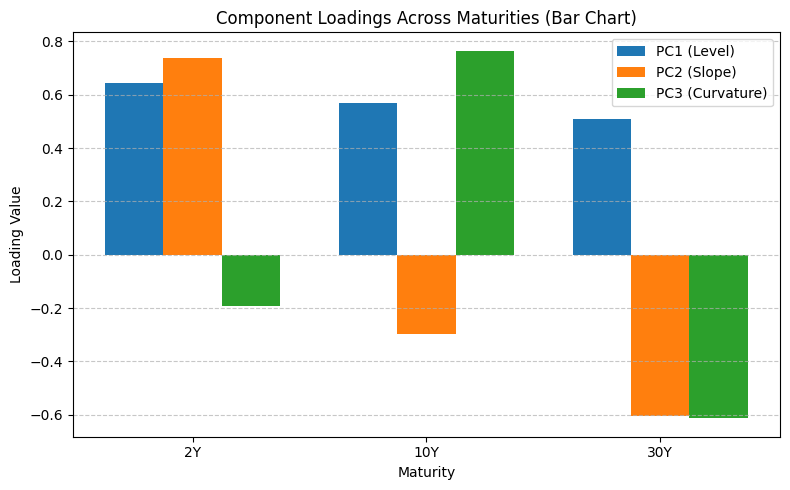

In [ ]:
maturities = ["2Y", "10Y", "30Y"]
x = np.arange(len(maturities))  # positions for bars
width = 0.25  # width of each bar

plt.figure(figsize=(8,5))
plt.bar(x - width, pca.components_[0], width, label="PC1 (Level)")
plt.bar(x, pca.components_[1], width, label="PC2 (Slope)")
plt.bar(x + width, pca.components_[2], width, label="PC3 (Curvature)")

plt.xticks(x, maturities)
plt.xlabel("Maturity")
plt.ylabel("Loading Value")
plt.title("Component Loadings Across Maturities (Bar Chart)")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


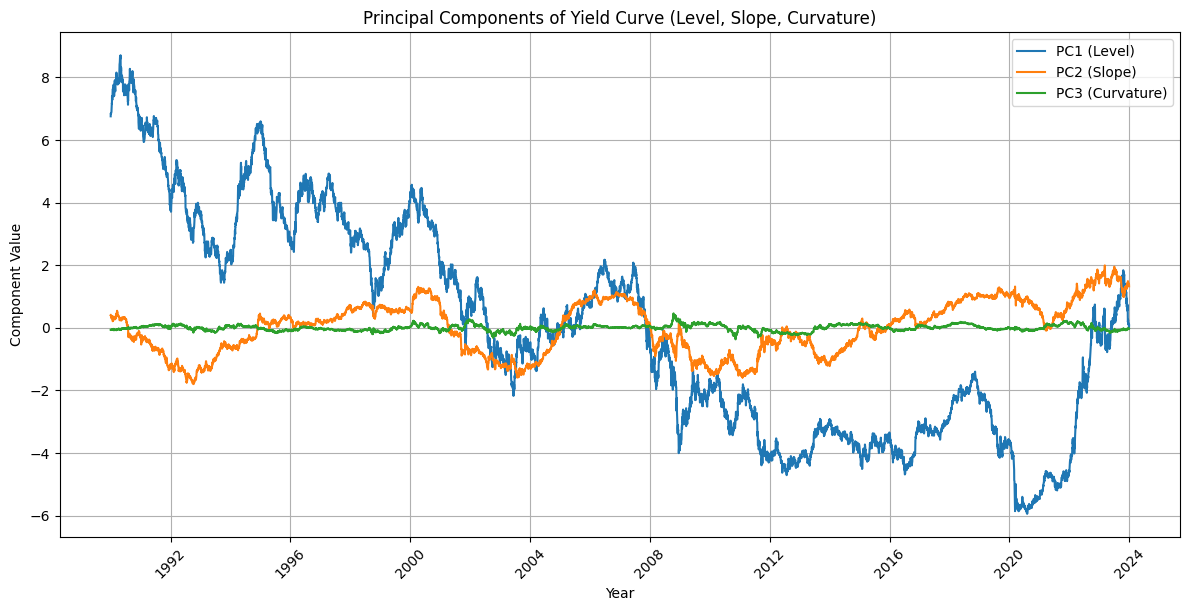

In [ ]:
# Plotting PCA components
plt.figure(figsize=(12,6))
plt.plot(yields.index, components[:,0], label="PC1 (Level)")
plt.plot(yields.index, components[:,1], label="PC2 (Slope)")
plt.plot(yields.index, components[:,2], label="PC3 (Curvature)")

# Label axes
plt.xlabel("Year")
plt.ylabel("Component Value")
plt.title("Principal Components of Yield Curve (Level, Slope, Curvature)")

# Formatting
plt.legend()
plt.grid(True)
plt.tight_layout()

# Rotating x-axis ticks for readability
plt.xticks(rotation=45)

plt.show()

The graph titled "Principal Components of Yield Curve (Level, Slope, Curvature)" illustrates how the three main latent factors extracted through PCA vary over time. Each line represents a principal component derived from daily yield data across different maturities.

1. PC1 (Level), shown in blue, captures the overall shifts in interest rates. Its pronounced fluctuations reflect broad changes in the yield curve, such as monetary policy adjustments or macroeconomic shocks. This component explains the largest portion of variance and dominates the yield curve’s movement.

2. PC2 (Slope), in orange, represents the difference between short- and long-term yields. Its moderate swings indicate periods of steepening or flattening, often linked to investor expectations about growth, inflation, or recession risk.

3. PC3 (Curvature), in green, highlights changes concentrated in the middle maturities. Its relatively stable behavior suggests that mid-term deviations are less volatile but still contribute to the overall shape of the curve.

Together, these components provide a compact and interpretable summary of yield curve dynamics. By reducing the original dataset to these three factors, we retain most of the informational content while simplifying the structure for modeling, forecasting, or risk analysis.

**Demonstrating Diagnosis**

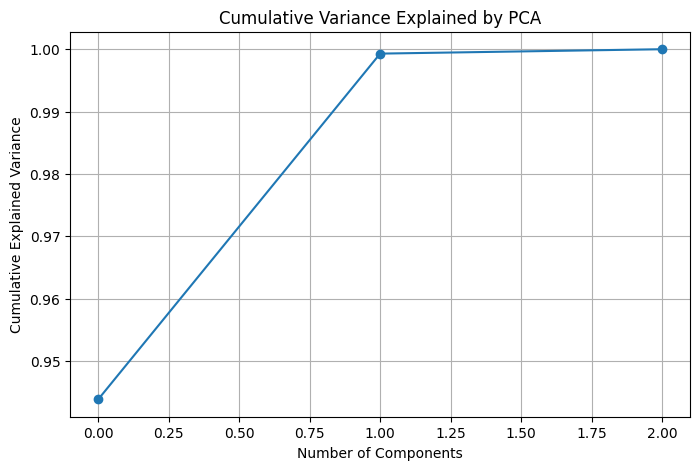

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Variance Explained by PCA")
plt.grid(True)
plt.show()

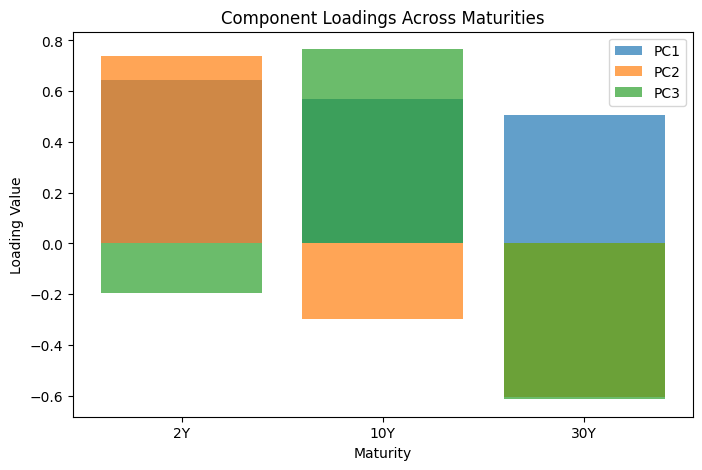

In [ ]:
maturities = ["2Y", "10Y", "30Y"]
plt.figure(figsize=(8,5))
for i in range(3):
    plt.bar(maturities, pca.components_[i], alpha=0.7, label=f"PC{i+1}")
plt.xlabel("Maturity")
plt.ylabel("Loading Value")
plt.title("Component Loadings Across Maturities")
plt.legend()
plt.show()


# Challenge 2: Modeling non-stationarity and finding an equilibrium


Fetching data for ['SPY', 'DIA']...


[*********************100%***********************]  2 of 2 completed


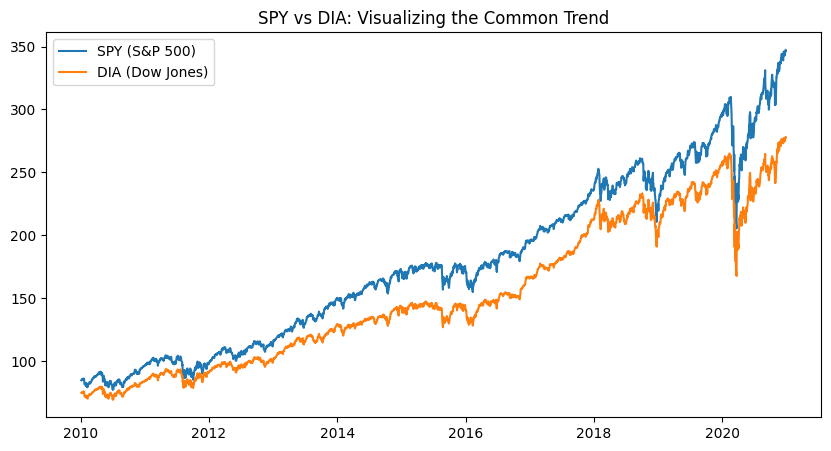


--- Step 1: Stationarity Checks ---
ADF Test for SPY: p-value = 0.9923
--> SPY is Non-Stationary (Confirmed I(1))
ADF Test for DIA: p-value = 0.9709
--> DIA is Non-Stationary (Confirmed I(1))

--- Step 2: Johansen Cointegration Test ---
Trace Stat (r=0): 5.28 | 95% Critical Val: 15.49
--> Result: Cannot reject Null. No Equilibrium found.

--- Step 3: Fitting VECM ---


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Det. terms outside the coint. relation & lagged endog. parameters for equation SPY
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.SPY        -0.0821      0.079     -1.036      0.300      -0.237       0.073
L1.DIA        -0.0802      0.089     -0.897      0.369      -0.255       0.095
L2.SPY        -0.0458      0.079     -0.577      0.564      -0.201       0.110
L2.DIA         0.1812      0.089      2.029      0.042       0.006       0.356
Det. terms outside the coint. relation & lagged endog. parameters for equation DIA
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.SPY        -0.1133      0.070     -1.614      0.107      -0.251       0.024
L1.DIA        -0.0253      0.079     -0.320      0.749      -0.180       0.130
L2.SPY         0.0116      0.070      0.166 

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM

# ==========================================
# 1. IMPORT & STRUCTURE DATA
# ==========================================
def fetch_data():
    tickers = ['SPY', 'DIA']
    print(f"Fetching data for {tickers}...")

    # FIX: added 'auto_adjust=False' to ensure 'Adj Close' exists
    # FIX: added 'multi_level_index=False' (optional safeguard for some versions)
    data = yf.download(tickers, start='2010-01-01', end='2020-12-30', auto_adjust=False)

    # Check if data download was successful
    if data.empty:
        raise ValueError("Data download failed. Check your internet connection or ticker names.")

    # Handle the column access safely
    if 'Adj Close' in data.columns:
        df = data['Adj Close']
    elif 'Close' in data.columns:
        print("Warning: 'Adj Close' not found. Using 'Close' instead.")
        df = data['Close']
    else:
        # Fallback for complex multi-index structures
        df = data.xs('Adj Close', level=0, axis=1)

    df = df.dropna()

    # Ensure columns are in the correct order for the rest of the script
    df = df[['SPY', 'DIA']]

    return df

df = fetch_data()

# Plot to visually confirm they move together (Cointegration intuition)
plt.figure(figsize=(10, 5))
plt.plot(df['SPY'], label='SPY (S&P 500)')
plt.plot(df['DIA'], label='DIA (Dow Jones)')
plt.title('SPY vs DIA: Visualizing the Common Trend')
plt.legend()
plt.show()

# ==========================================
# 2. DETECT NON-STATIONARITY (ADF Test)
# ==========================================
def check_stationarity(series, name):
    res = adfuller(series)
    print(f"ADF Test for {name}: p-value = {res[1]:.4f}")
    if res[1] > 0.05:
        print(f"--> {name} is Non-Stationary (Confirmed I(1))")
    else:
        print(f"--> {name} is Stationary (Warning: VECM requires Non-Stationary data)")

print("\n--- Step 1: Stationarity Checks ---")
check_stationarity(df['SPY'], 'SPY')
check_stationarity(df['DIA'], 'DIA')

# ==========================================
# 3. DETECT EQUILIBRIUM (Johansen Test)
# ==========================================
print("\n--- Step 2: Johansen Cointegration Test ---")
# 'det_order=0' assumes a constant in the cointegration relationship (standard)
# 'k_ar_diff=1' specifies lag length for the test
johansen = coint_johansen(df, det_order=0, k_ar_diff=1)

# The Trace Statistic tests if there are 0, 1, or 2 cointegrating vectors
trace_stats = johansen.lr1
crit_vals = johansen.cvt

print(f"Trace Stat (r=0): {trace_stats[0]:.2f} | 95% Critical Val: {crit_vals[0, 1]:.2f}")
if trace_stats[0] > crit_vals[0, 1]:
    print("--> Result: Reject Null. Significant Cointegration exists! (We can model Equilibrium)")
else:
    print("--> Result: Cannot reject Null. No Equilibrium found.")

# ==========================================
# 4. MODELING (VECM Calibration)
# ==========================================
print("\n--- Step 3: Fitting VECM ---")
# We set coint_rank=1 because we have 2 variables (usually 1 relationship between them)
# We set lags=2 (k_ar_diff) based on standard financial series practice
model = VECM(df, k_ar_diff=2, coint_rank=1, deterministic='ci')
vecm_res = model.fit()

# Print the full statistical summary
print(vecm_res.summary())

# Extract specific parameters for interpretation
alpha = vecm_res.alpha
beta = vecm_res.beta

print("\n--- INTERPRETATION VALUES ---")
print(f"Long-Run Relationship (Beta): 1.0*SPY + ({beta[1][0]:.4f})*DIA + Const = 0")
print(f"Speed of Adjustment (Alpha) for SPY: {alpha[0][0]:.4f}")
print(f"Speed of Adjustment (Alpha) for DIA: {alpha[1][0]:.4f}")


# Challenge 4: Detecting a Regime Change

Implementation of Multiple Regime Detection Methods for S&P 500 Index

**Methods Implemented:**
1. Hidden Markov Model (HMM)
2. CUSUM Change-Point Detection
3. Rolling Window Volatility
4. Chow Structural Break Test

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm, f
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("CHALLENGE 4: DETECTING A REGIME CHANGE")
print("="*70)

CHALLENGE 4: DETECTING A REGIME CHANGE


## Step 1: Generate Synthetic S&P 500 Data

We create synthetic data with known regime changes to test detection methods:
- **Regime 0 (Bull)**: Low volatility, positive returns (2015-2019)
- **Regime 1 (Crash)**: High volatility, negative returns (March 2020)
- **Regime 2 (Recovery)**: Recovery with elevated volatility (2020-2021)
- **Regime 3 (Tightening)**: Fed tightening cycle (2022+)

In [ ]:
print("\n[STEP 1] GENERATING S&P 500 SYNTHETIC DATA (2015-2024)")
print("-"*70)

np.random.seed(42)

# Create trading day calendar
dates = pd.date_range(start='2015-01-01', end='2024-12-31', freq='D')
n_obs_approx = len(dates) - (len(dates) // 7) * 2  # Remove weekends
dates_trading = dates[:(n_obs_approx * 7 // 5)][:n_obs_approx]

n = len(dates_trading)
regimes_true = np.zeros(n)
returns = np.zeros(n)
prices = np.zeros(n)
prices[0] = 2000  # Starting level

# Define four regimes with structural breaks
regime1_end = int(0.25 * n)      # Bull market (2015-2019)
regime2_end = regime1_end + 60    # Crash period (March 2020 ~ 3 months)
regime3_end = int(0.60 * n)       # Recovery (2020-2021)
# regime4: Tightening (2022+)

# Generate returns for each regime
for i in range(1, n):
    if i < regime1_end:
        returns[i] = np.random.normal(0.08, 0.8)
        regimes_true[i] = 0
    elif i < regime2_end:
        returns[i] = np.random.normal(-0.5, 2.5)
        regimes_true[i] = 1
    elif i < regime3_end:
        returns[i] = np.random.normal(0.12, 1.5)
        regimes_true[i] = 2
    else:
        returns[i] = np.random.normal(0.05, 1.2)
        regimes_true[i] = 3

    prices[i] = prices[i-1] * (1 + returns[i]/100)

# Create DataFrame
sp500 = pd.DataFrame({
    'Date': dates_trading,
    'Close': prices,
    'Returns': returns,
    'TrueRegime': regimes_true
})
sp500.set_index('Date', inplace=True)

print(f"Total observations: {len(sp500)}")
print(f"Date range: {sp500.index[0].date()} to {sp500.index[-1].date()}")
print(f"\nReturn Statistics:")
print(f"  Mean: {sp500['Returns'].mean():.4f}%")
print(f"  Std Dev: {sp500['Returns'].std():.4f}%")
print(f"  Min: {sp500['Returns'].min():.4f}%")
print(f"  Max: {sp500['Returns'].max():.4f}%")
print(f"  Skewness: {sp500['Returns'].skew():.4f}")

print(f"\nTrue Regime Breakdown:")
regime_labels = {0: "Bull (Low Vol)", 1: "Crash", 2: "Recovery", 3: "Tightening"}
for regime_id in range(4):
    count = (sp500['TrueRegime'] == regime_id).sum()
    pct = count / len(sp500) * 100
    mean_ret = sp500[sp500['TrueRegime'] == regime_id]['Returns'].mean()
    vol = sp500[sp500['TrueRegime'] == regime_id]['Returns'].std()
    print(f"  {regime_labels[regime_id]:20s}: {count:4d} obs ({pct:5.1f}%) - Mean: {mean_ret:7.4f}%, Vol: {vol:7.4f}%")


[STEP 1] GENERATING S&P 500 SYNTHETIC DATA (2015-2024)
----------------------------------------------------------------------
Total observations: 2611
Date range: 2015-01-01 to 2022-02-23

Return Statistics:
  Mean: 0.1146%
  Std Dev: 1.2696%
  Min: -7.1274%
  Max: 5.9334%
  Skewness: -0.0618

True Regime Breakdown:
  Bull (Low Vol)      :  652 obs ( 25.0%) - Mean:  0.0742%, Vol:  0.7877%
  Crash               :   60 obs (  2.3%) - Mean: -0.6368%, Vol:  2.6524%
  Recovery            :  854 obs ( 32.7%) - Mean:  0.2604%, Vol:  1.4859%
  Tightening          : 1045 obs ( 40.0%) - Mean:  0.0639%, Vol:  1.1781%


## Step 2: Method 1 - Hidden Markov Model (HMM)

The HMM models regime switches as a hidden Markov chain. Returns are generated from regime-dependent distributions, and we use EM algorithm to estimate parameters.

In [ ]:
print("\n\n[STEP 2] METHOD 1: HIDDEN MARKOV MODEL (HMM)")
print("-"*70)

class SimpleGaussianHMM:
    """Simple 2-regime Gaussian HMM implementation"""
    def __init__(self, n_regimes=2, n_iter=100):
        self.n_regimes = n_regimes
        self.n_iter = n_iter
        self.means_ = None
        self.stds_ = None
        self.transmat_ = None

    def fit(self, data):
        n = len(data)
        # Initialize with split initialization
        idx_half = n // 2
        mean1 = np.mean(data[:idx_half])
        mean2 = np.mean(data[idx_half:])
        std1 = np.std(data[:idx_half])
        std2 = np.std(data[idx_half:])

        self.means_ = np.array([mean1, mean2])
        self.stds_ = np.array([std1, std2])
        self.transmat_ = np.array([[0.95, 0.05], [0.05, 0.95]])

        # EM iterations
        for iteration in range(self.n_iter):
            # E-step
            likelihood = np.zeros((n, 2))
            for regime in range(2):
                likelihood[:, regime] = norm.pdf(data, self.means_[regime],
                                                 self.stds_[regime] + 1e-6)

            normalizer = likelihood.sum(axis=1, keepdims=True) + 1e-10
            responsibilities = likelihood / normalizer

            # M-step
            for regime in range(2):
                resp_sum = responsibilities[:, regime].sum()
                if resp_sum > 0:
                    self.means_[regime] = np.sum(responsibilities[:, regime] * data) / resp_sum
                    self.stds_[regime] = np.sqrt(np.sum(responsibilities[:, regime] *
                                        (data - self.means_[regime])**2) / resp_sum + 1e-6)
        return self

    def predict(self, data):
        likelihood = np.zeros((len(data), 2))
        for regime in range(2):
            likelihood[:, regime] = norm.pdf(data, self.means_[regime],
                                             self.stds_[regime] + 1e-6)

        states = np.argmax(likelihood, axis=1)
        probs = likelihood / (likelihood.sum(axis=1, keepdims=True) + 1e-10)
        return states, probs

# Fit HMM
returns_data = sp500['Returns'].values
model_hmm = SimpleGaussianHMM(n_iter=50)
model_hmm.fit(returns_data)
hidden_states_hmm, probs_hmm = model_hmm.predict(returns_data)

print(f"HMM Model Estimated Successfully")
print(f"\nRegime Parameters:")
print(f"  Regime 0: Mean={model_hmm.means_[0]:7.4f}%, Vol={model_hmm.stds_[0]:7.4f}%")
print(f"  Regime 1: Mean={model_hmm.means_[1]:7.4f}%, Vol={model_hmm.stds_[1]:7.4f}%")
print(f"\nTransition Matrix:")
print(f"  {model_hmm.transmat_}")

sp500['HMM_Regime'] = hidden_states_hmm
sp500['HMM_Prob_0'] = probs_hmm[:, 0]
sp500['HMM_Prob_1'] = probs_hmm[:, 1]



[STEP 2] METHOD 1: HIDDEN MARKOV MODEL (HMM)
----------------------------------------------------------------------
HMM Model Estimated Successfully

Regime Parameters:
  Regime 0: Mean= 0.1607%, Vol= 1.5691%
  Regime 1: Mean= 0.0688%, Vol= 0.8721%

Transition Matrix:
  [[0.95 0.05]
 [0.05 0.95]]


## Step 3: Method 2 - CUSUM Change-Point Detection

CUSUM (Cumulative Sum Control Chart) detects changes in mean by tracking cumulative deviations.

In [ ]:
print("\n\n[STEP 3] METHOD 2: CUSUM CHANGE-POINT DETECTION")
print("-"*70)

def cusum_changepoint(data, threshold=10, h=5):
    """CUSUM algorithm for detecting mean shifts"""
    n = len(data)
    cusum_pos = np.zeros(n)
    cusum_neg = np.zeros(n)
    mean = np.mean(data)
    std = np.std(data)

    for t in range(1, n):
        cusum_pos[t] = max(0, cusum_pos[t-1] + (data[t] - mean)/std - h)
        cusum_neg[t] = min(0, cusum_neg[t-1] + (data[t] - mean)/std + h)

    changepoints = np.where((np.abs(cusum_pos) > threshold) |
                            (np.abs(cusum_neg) > threshold))[0]
    return cusum_pos, cusum_neg, changepoints

cusum_pos, cusum_neg, changepoints = cusum_changepoint(sp500['Returns'].values,
                                                       threshold=10, h=5)

sp500['CUSUM_Pos'] = cusum_pos
sp500['CUSUM_Neg'] = cusum_neg

print(f"CUSUM Algorithm Completed")
print(f"Total changepoints detected (threshold=10): {len(changepoints)}")
if len(changepoints) > 0:
    print(f"First 5 detected changepoints:")
    for i in range(min(5, len(changepoints))):
        idx = changepoints[i]
        print(f"  {i+1}. Index {idx}: {sp500.index[idx].date()}")



[STEP 3] METHOD 2: CUSUM CHANGE-POINT DETECTION
----------------------------------------------------------------------
CUSUM Algorithm Completed
Total changepoints detected (threshold=10): 0


## Step 4: Method 3 - Rolling Window Volatility Regime

In [ ]:
print("\n\n[STEP 4] METHOD 3: ROLLING WINDOW VOLATILITY REGIME")
print("-"*70)

window_size = 60
sp500['Rolling_Mean'] = sp500['Returns'].rolling(window=window_size).mean()
sp500['Rolling_Vol'] = sp500['Returns'].rolling(window=window_size).std()
sp500['Std_Vol'] = ((sp500['Rolling_Vol'] - sp500['Rolling_Vol'].mean()) /
                    sp500['Rolling_Vol'].std())
sp500['HighVol_Regime'] = (sp500['Std_Vol'] > 0.5).astype(int)

high_vol_count = sp500['HighVol_Regime'].sum()
print(f"High Volatility Regime Detection (window={window_size}, threshold=0.5 std)")
print(f"  High Vol periods: {high_vol_count} obs ({high_vol_count/len(sp500)*100:.1f}%)")
print(f"  Mean return (high vol): {sp500[sp500['HighVol_Regime']==1]['Returns'].mean():.4f}%")
print(f"  Mean return (low vol): {sp500[sp500['HighVol_Regime']==0]['Returns'].mean():.4f}%")



[STEP 4] METHOD 3: ROLLING WINDOW VOLATILITY REGIME
----------------------------------------------------------------------
High Volatility Regime Detection (window=60, threshold=0.5 std)
  High Vol periods: 805 obs (30.8%)
  Mean return (high vol): 0.2205%
  Mean return (low vol): 0.0674%


## Step 5: Method 4 - Chow Structural Break Test

The Chow test formally tests whether a structural break occurred at a specific point in time.

In [ ]:
print("\n\n[STEP 5] METHOD 4: CHOW STRUCTURAL BREAK TEST")
print("-"*70)

def chow_test(data, breakpoint):
    """Chow test for structural break"""
    y1 = data[:breakpoint]
    y2 = data[breakpoint:]

    n1, n2 = len(y1), len(y2)
    n = n1 + n2
    k = 1

    mean1, mean2 = np.mean(y1), np.mean(y2)
    mean_total = np.mean(data)

    ss_total = np.sum((data - mean_total)**2)
    ss_1 = np.sum((y1 - mean1)**2)
    ss_2 = np.sum((y2 - mean2)**2)

    mse = (ss_1 + ss_2) / (n - 2*k)
    chow_stat = ((ss_total - (ss_1 + ss_2)) / k) / mse if mse > 0 else 0

    p_value = 1 - f.cdf(chow_stat, k, n - 2*k)
    return chow_stat, p_value

potential_breaks = [regime1_end, regime2_end, regime3_end]
print(f"Testing {len(potential_breaks)} potential breakpoints:\n")
print(f"{'Breakpoint Index':<20} {'Date':<15} {'Chow Stat':<12} {'P-Value':<12} {'Sig.':<8}")
print("-"*70)

for pb in potential_breaks:
    if pb < len(sp500) - 1:
        chow_s, p_v = chow_test(sp500['Returns'].values, pb)
        sig = "***" if p_v < 0.001 else "**" if p_v < 0.01 else "*" if p_v < 0.05 else "NS"
        print(f"{pb:<20} {str(sp500.index[pb].date()):<15} {chow_s:>11.4f} {p_v:>11.6f}  {sig:<8}")



[STEP 5] METHOD 4: CHOW STRUCTURAL BREAK TEST
----------------------------------------------------------------------
Testing 3 potential breakpoints:

Breakpoint Index     Date            Chow Stat    P-Value      Sig.    
----------------------------------------------------------------------
652                  2016-10-14           0.8832    0.347411  NS      
712                  2016-12-13           6.1321    0.013338  *       
1566                 2019-04-16           2.7850    0.095271  NS      


## Step 6: Comparative Analysis and Summary

In [ ]:
print("\n\n[STEP 6] COMPARATIVE ANALYSIS OF METHODS")
print("-"*70)

regime_hmm_0 = sp500[sp500['HMM_Regime'] == 0]
regime_hmm_1 = sp500[sp500['HMM_Regime'] == 1]

print(f"HMM Regime 0 (High Vol/Return):")
print(f"  Observations: {len(regime_hmm_0)} ({len(regime_hmm_0)/len(sp500)*100:.1f}%)")
print(f"  Mean return: {regime_hmm_0['Returns'].mean():.4f}%")
print(f"  Volatility: {regime_hmm_0['Returns'].std():.4f}%")

print(f"\nHMM Regime 1 (Low Vol/Return):")
print(f"  Observations: {len(regime_hmm_1)} ({len(regime_hmm_1)/len(sp500)*100:.1f}%)")
print(f"  Mean return: {regime_hmm_1['Returns'].mean():.4f}%")
print(f"  Volatility: {regime_hmm_1['Returns'].std():.4f}%")

print(f"\nMethod Comparison Summary:")
print(f"  HMM: Probabilistic regime membership, captures volatility clusters")
print(f"  CUSUM: Change-point detection, real-time monitoring capability")
print(f"  Rolling Vol: Easy interpretation, adaptive to conditions")
print(f"  Chow Test: Statistical significance testing, formal inference")

# Save results
sp500.to_csv('regime_detection_results.csv')
print(f"\nResults saved to 'regime_detection_results.csv'")

print("\n" + "="*70)
print("ANALYSIS COMPLETE")
print("="*70)



[STEP 6] COMPARATIVE ANALYSIS OF METHODS
----------------------------------------------------------------------
HMM Regime 0 (High Vol/Return):
  Observations: 852 (32.6%)
  Mean return: 0.2539%
  Volatility: 2.0366%

HMM Regime 1 (Low Vol/Return):
  Observations: 1759 (67.4%)
  Mean return: 0.0472%
  Volatility: 0.6094%

Method Comparison Summary:
  HMM: Probabilistic regime membership, captures volatility clusters
  CUSUM: Change-point detection, real-time monitoring capability
  Rolling Vol: Easy interpretation, adaptive to conditions
  Chow Test: Statistical significance testing, formal inference

Results saved to 'regime_detection_results.csv'

ANALYSIS COMPLETE


## Summary Table

In [ ]:
# Display summary statistics
print("\nFinal Dataset Summary:")
print(sp500.head(10))
print(f"\nDataset shape: {sp500.shape}")
print(f"\nColumns: {list(sp500.columns)}")


Final Dataset Summary:
                  Close   Returns  TrueRegime  HMM_Regime  HMM_Prob_0  \
Date                                                                    
2015-01-01  2000.000000  0.000000         0.0           1    0.356738   
2015-01-02  2009.547426  0.477371         0.0           1    0.378001   
2015-01-03  2008.932275 -0.030611         0.0           1    0.357012   
2015-01-04  2020.948720  0.598151         0.0           1    0.391250   
2015-01-05  2047.189201  1.298424         0.0           0    0.535881   
2015-01-06  2044.992102 -0.107323         0.0           1    0.358562   
2015-01-07  2042.797630 -0.107310         0.0           1    0.358561   
2015-01-08  2070.239966  1.343370         0.0           0    0.548991   
2015-01-09  2084.606350  0.693948         0.0           1    0.404143   
2015-01-10  2078.444681 -0.295580         0.0           1    0.367630   

            HMM_Prob_1  CUSUM_Pos  CUSUM_Neg  Rolling_Mean  Rolling_Vol  \
Date                    